<a href="https://www.kaggle.com/code/mohamedhany777/face-detection-recognition?scriptVersionId=191945001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **install MTCNN for face detection**

In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.0 MB/s eta 0:00:00


## install facenet for face recognition

In [2]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... - done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=de0f3cae8ccfc55b748842a986f17904567a5282c324eaffb3bb4407fc11ca19
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


## **import needed libraries**

In [3]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2024-08-10 15:48:26.821331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 15:48:26.821432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 15:48:26.959490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **read image**

In [4]:
img =cv.imread('/kaggle/input/vggface-using-tripletloss/dataset/dataset/Bill_Simon/Bill_Simon_0001.jpg')

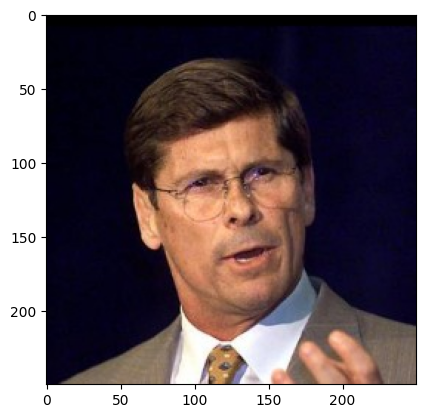

In [5]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
detector=MTCNN()
results=detector.detect_faces(img)

2024-08-10 15:48:41.597913: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65712: 6.89793, expected 6.07464
2024-08-10 15:48:41.597971: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65713: 6.87918, expected 6.05589
2024-08-10 15:48:41.597986: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65714: 7.22328, expected 6.39999
2024-08-10 15:48:41.598000: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65715: 7.05689, expected 6.2336
2024-08-10 15:48:41.598018: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65719: 6.75598, expected 5.93269
2024-08-10 15:48:41.598030: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65720: 6.35222, expected 5.52893
2024-08-10 15:48:41.598041: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65721: 6.81636, expected 5.99306
2024-08-10 15:48:41.598053: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1723304922.170815      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-08-10 15:48:42.394583: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 103: 4.29284, expected 3.74956
2024-08-10 15:48:42.394641: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 520: 4.11639, expected 3.57311
2024-08-10 15:48:42.394658: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 626: 4.10851, expected 3.56523
2024-08-10 15:48:42.394677: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1749: 4.37342, expected 3.83014
2024-08-10 15:48:42.394688: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1875: 4.42871, expected 3.88543
2024-08-10 15:48:42.394734: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7432: 4.38647, expected 3.84319
2024-08-10 15:48:42

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


2024-08-10 15:48:45.974064: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1457: 6.97102, expected 6.13827
2024-08-10 15:48:45.974133: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1459: 6.62419, expected 5.79144
2024-08-10 15:48:45.974143: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1460: 5.92067, expected 5.08792
2024-08-10 15:48:45.974151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1461: 5.6166, expected 4.78384
2024-08-10 15:48:45.974159: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1463: 7.32249, expected 6.48974
2024-08-10 15:48:45.974167: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1464: 7.02936, expected 6.1966
2024-08-10 15:48:45.974175: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1465: 7.31734, expected 6.48458
2024-08-10 15:48:45.974182: E extern

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step

2024-08-10 15:48:46.586685: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.96922, expected 7.01
2024-08-10 15:48:46.586741: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.02723, expected 7.06801
2024-08-10 15:48:46.586759: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.32811, expected 6.36889
2024-08-10 15:48:46.586774: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 8.088, expected 7.12878
2024-08-10 15:48:46.586785: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.74002, expected 4.7808
2024-08-10 15:48:46.586795: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.04558, expected 6.08636
2024-08-10 15:48:46.586805: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.14782, expected 5.1886
2024-08-10 15:48:46.586816: E external/local_xla/xla/service/g

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


2024-08-10 15:48:47.275072: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4232: 8.06843, expected 7.11307
2024-08-10 15:48:47.275130: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4233: 6.40873, expected 5.45336
2024-08-10 15:48:47.275140: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4234: 6.38862, expected 5.43325
2024-08-10 15:48:47.275148: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4235: 6.48927, expected 5.5339
2024-08-10 15:48:47.275156: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4236: 7.78845, expected 6.83308
2024-08-10 15:48:47.275164: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4237: 7.38454, expected 6.42917
2024-08-10 15:48:47.275172: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4238: 6.81393, expected 5.85856
2024-08-10 15:48:47.275179: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


In [7]:
results

[{'box': [74, 70, 94, 116],
  'confidence': 0.9999761581420898,
  'keypoints': {'left_eye': (107, 115),
   'right_eye': (146, 107),
   'nose': (136, 134),
   'mouth_left': (122, 164),
   'mouth_right': (153, 157)}}]

In [8]:
x,y,w,h=results[0]['box']

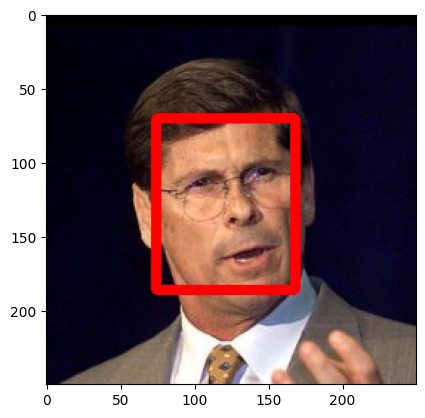

In [9]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 5)
plt.imshow(img)

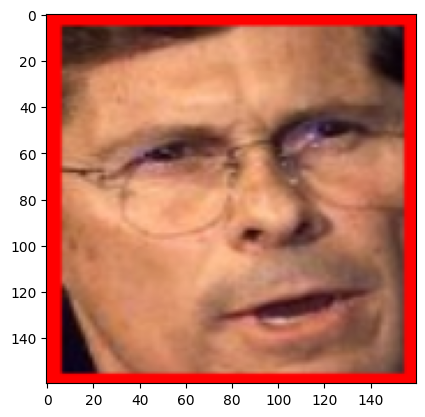

In [10]:
my_face = img[y:y+h, x:x+w]
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [11]:
my_face

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

## **Automate the preprocessing**

In [12]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)

In [13]:
faceloading = FACELOADING("/kaggle/input/vggface-using-tripletloss/dataset/dataset")
X, Y = faceloading.load_classes()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


2024-08-10 15:48:52.136457: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 4.40306, expected 3.77572
2024-08-10 15:48:52.136535: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 5.16637, expected 4.53902
2024-08-10 15:48:52.136546: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 166: 5.26059, expected 4.63324
2024-08-10 15:48:52.136555: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 375: 5.0737, expected 4.44635
2024-08-10 15:48:52.136563: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 402: 5.25195, expected 4.6246
2024-08-10 15:48:52.136571: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 420: 5.25032, expected 4.62297
2024-08-10 15:48:52.136579: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 427: 5.01308, expected 4.38573
2024-08-10 15:48:52.136586: E external/local_x

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

2024-08-10 15:48:53.293791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.91061, expected 6.91811
2024-08-10 15:48:53.293848: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 8.74533, expected 7.75283
2024-08-10 15:48:53.293858: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 8.32064, expected 7.32814
2024-08-10 15:48:53.293866: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.074, expected 6.0815
2024-08-10 15:48:53.293874: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.74981, expected 6.75731
2024-08-10 15:48:53.293882: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.40884, expected 6.41634
2024-08-10 15:48:53.293890: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.93266, expected 5.94016
2024-08-10 15:48:53.293897: E external/local_xla/xla/servi

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


2024-08-10 15:48:53.965855: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2956: 4.6864, expected 4.10022
2024-08-10 15:48:53.965942: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6349: 7.88063, expected 6.95479
2024-08-10 15:48:53.965959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6350: 7.65919, expected 6.73335
2024-08-10 15:48:53.965970: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6352: 6.87632, expected 5.95049
2024-08-10 15:48:53.965982: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6354: 7.44969, expected 6.52385
2024-08-10 15:48:53.965993: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6355: 5.63069, expected 4.70485
2024-08-10 15:48:53.966003: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6356: 6.07186, expected 5.14602
2024-08-10 15:48:53.966014: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


2024-08-10 15:48:56.786043: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10587: 5.37774, expected 4.65919
2024-08-10 15:48:56.786103: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10588: 4.39398, expected 3.67543
2024-08-10 15:48:56.786112: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10589: 5.07589, expected 4.35735
2024-08-10 15:48:56.786120: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10592: 5.74592, expected 5.02737
2024-08-10 15:48:56.786128: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10604: 5.36903, expected 4.65049
2024-08-10 15:48:56.786153: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10605: 5.91484, expected 5.1963
2024-08-10 15:48:56.786162: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10610: 5.15959, expected 4.44105
2024-08-10 15:48:56.786170: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-08-10 15:48:57.877269: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.2595, expected 6.36441
2024-08-10 15:48:57.877323: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.81092, expected 6.91583
2024-08-10 15:48:57.877338: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.30463, expected 6.40954
2024-08-10 15:48:57.877351: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.05264, expected 6.15755
2024-08-10 15:48:57.877364: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.00929, expected 6.1142
2024-08-10 15:48:57.877374: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.10681, expected 5.21172
2024-08-10 15:48:57.877385: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.45392, expected 5.55883
2024-08-10 15:48:57.877395: E external/local_xla/xla/serv

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


2024-08-10 15:49:00.679198: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2123: 6.62589, expected 5.82527
2024-08-10 15:49:00.679267: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2124: 5.42069, expected 4.62007
2024-08-10 15:49:00.679277: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2146: 6.84351, expected 6.04289
2024-08-10 15:49:00.679285: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2147: 6.96135, expected 6.16072
2024-08-10 15:49:00.679293: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2170: 6.78198, expected 5.98136
2024-08-10 15:49:00.679301: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2171: 6.7445, expected 5.94388
2024-08-10 15:49:00.679309: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2178: 6.93731, expected 6.13669
2024-08-10 15:49:00.679316: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2024-08-10 15:49:02.897793: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.89454, expected 7.00491
2024-08-10 15:49:02.897852: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.38245, expected 6.49282
2024-08-10 15:49:02.897867: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.75183, expected 6.86219
2024-08-10 15:49:02.897879: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.7831, expected 6.89346
2024-08-10 15:49:02.897891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.35445, expected 5.46482
2024-08-10 15:49:02.897903: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.88436, expected 5.99472
2024-08-10 15:49:02.897914: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.35509, expected 5.46546
2024-08-10 15:49:02.897924: E external/local_xla/xla/ser

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


2024-08-10 15:49:03.427405: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6723: 5.48594, expected 4.83249
2024-08-10 15:49:03.427456: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6775: 5.40496, expected 4.75151
2024-08-10 15:49:03.427474: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6952: 5.34209, expected 4.68864
2024-08-10 15:49:03.427500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7144: 5.39532, expected 4.74187
2024-08-10 15:49:03.427513: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7187: 5.38523, expected 4.73178
2024-08-10 15:49:03.427523: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7188: 4.87004, expected 4.21658
2024-08-10 15:49:03.427535: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7189: 5.50577, expected 4.85232
2024-08-10 15:49:03.427545: E exte

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-08-10 15:49:04.604591: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4272: 4.76021, expected 4.16113
2024-08-10 15:49:04.604651: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4374: 4.64693, expected 4.04785
2024-08-10 15:49:04.604669: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4550: 4.86989, expected 4.27081
2024-08-10 15:49:04.604683: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4652: 4.77211, expected 4.17303
2024-08-10 15:49:04.604694: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4653: 4.10228, expected 3.5032
2024-08-10 15:49:04.604706: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4675: 4.95948, expected 4.3604
2024-08-10 15:49:04.604719: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4836: 4.55976, expected 3.96068
2024-08-10 15:49:04.604732: E extern

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

2024-08-10 15:49:06.421614: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 484: 7.47053, expected 6.59296
2024-08-10 15:49:06.421673: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 488: 6.89203, expected 6.01446
2024-08-10 15:49:06.421688: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 489: 7.308, expected 6.43043
2024-08-10 15:49:06.421702: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 490: 6.95891, expected 6.08133
2024-08-10 15:49:06.421713: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 491: 6.87556, expected 5.99799
2024-08-10 15:49:06.421724: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 492: 6.77389, expected 5.89632
2024-08-10 15:49:06.421734: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 493: 6.24693, expected 5.36936
2024-08-10 15:49:06.421751: E external/loca

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

2024-08-10 15:49:07.531822: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 968: 6.8715, expected 5.95816
2024-08-10 15:49:07.531879: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 969: 7.30233, expected 6.38899
2024-08-10 15:49:07.531895: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 970: 7.97026, expected 7.05693
2024-08-10 15:49:07.531906: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 972: 6.61419, expected 5.70086
2024-08-10 15:49:07.531916: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 973: 7.0478, expected 6.13446
2024-08-10 15:49:07.531927: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 974: 6.01824, expected 5.1049
2024-08-10 15:49:07.531938: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 975: 6.47452, expected 5.56119
2024-08-10 15:49:07.531950: E external/local

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


2024-08-10 15:49:08.064422: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8466: 6.11571, expected 5.39904
2024-08-10 15:49:08.064479: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8471: 5.26088, expected 4.54421
2024-08-10 15:49:08.064488: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8472: 5.37587, expected 4.6592
2024-08-10 15:49:08.064503: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8474: 5.48657, expected 4.7699
2024-08-10 15:49:08.064511: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8482: 6.03527, expected 5.3186
2024-08-10 15:49:08.064519: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8487: 6.11668, expected 5.40002
2024-08-10 15:49:08.064527: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8489: 5.84308, expected 5.12641
2024-08-10 15:49:08.064535: E externa

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

2024-08-10 15:49:09.891146: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.13931, expected 6.32489
2024-08-10 15:49:09.891207: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.23555, expected 5.42112
2024-08-10 15:49:09.891236: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.58994, expected 5.77551
2024-08-10 15:49:09.891247: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.43954, expected 5.62511
2024-08-10 15:49:09.891257: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.55127, expected 5.73684
2024-08-10 15:49:09.891268: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 6.52173, expected 5.70731
2024-08-10 15:49:09.891278: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 6.86907, expected 6.05464
2024-08-10 15:49:09.891289: E external/local_xla/xla

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-08-10 15:49:11.070781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1937: 6.77393, expected 5.88723
2024-08-10 15:49:11.070840: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1939: 7.43421, expected 6.54751
2024-08-10 15:49:11.070857: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1940: 7.62612, expected 6.73942
2024-08-10 15:49:11.070871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1941: 6.41867, expected 5.53197
2024-08-10 15:49:11.070881: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1942: 7.69709, expected 6.81039
2024-08-10 15:49:11.070892: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1943: 6.12824, expected 5.24154
2024-08-10 15:49:11.070902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1944: 5.94772, expected 5.06102
2024-08-10 15:49:11.070913: E exte

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━

2024-08-10 15:49:13.956377: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 246: 4.6851, expected 4.11632
2024-08-10 15:49:13.956441: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1192: 5.20637, expected 4.55776
2024-08-10 15:49:13.956451: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1215: 4.86581, expected 4.21721
2024-08-10 15:49:13.956459: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1237: 4.95721, expected 4.3086
2024-08-10 15:49:13.956467: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1266: 5.4363, expected 4.78769
2024-08-10 15:49:13.956480: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2552: 4.3053, expected 3.748
2024-08-10 15:49:13.956489: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2674: 4.49278, expected 3.93549
2024-08-10 15:49:13.956504: E external/lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-08-10 15:49:18.244295: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.30888, expected 7.34672
2024-08-10 15:49:18.244353: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.12641, expected 6.16424
2024-08-10 15:49:18.244368: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.98126, expected 7.0191
2024-08-10 15:49:18.244382: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.94229, expected 4.98013
2024-08-10 15:49:18.244393: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.65353, expected 4.69137
2024-08-10 15:49:18.244403: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.82183, expected 5.85967
2024-08-10 15:49:18.244415: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 8.07916, expected 7.117
2024-08-10 15:49:18.244425: E external/local_xla/xla/serv

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-08-10 15:49:19.435848: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 976: 5.91611, expected 5.18903
2024-08-10 15:49:19.435907: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 995: 6.03749, expected 5.31041
2024-08-10 15:49:19.435922: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 996: 5.98649, expected 5.25941
2024-08-10 15:49:19.435936: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 997: 5.79355, expected 5.06647
2024-08-10 15:49:19.435949: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 998: 6.1248, expected 5.39772
2024-08-10 15:49:19.435959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 999: 5.96055, expected 5.23347
2024-08-10 15:49:19.435970: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1004: 6.16067, expected 5.43359
2024-08-10 15:49:19.435980: E external/lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

2024-08-10 15:49:20.595828: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 493: 7.92139, expected 7.00547
2024-08-10 15:49:20.595885: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 512: 7.8738, expected 6.95787
2024-08-10 15:49:20.595894: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 513: 7.77988, expected 6.86395
2024-08-10 15:49:20.595902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 515: 7.66529, expected 6.74936
2024-08-10 15:49:20.595911: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 520: 7.98796, expected 7.07203
2024-08-10 15:49:20.595919: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 525: 7.83287, expected 6.91694
2024-08-10 15:49:20.595928: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 537: 8.00066, expected 7.08473
2024-08-10 15:49:20.595936: E external/loc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

2024-08-10 15:49:22.892347: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 752: 4.40101, expected 3.84923
2024-08-10 15:49:22.892402: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 760: 4.45658, expected 3.9048
2024-08-10 15:49:22.892413: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 973: 8.05683, expected 7.13835
2024-08-10 15:49:22.892421: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 975: 7.70393, expected 6.78546
2024-08-10 15:49:22.892429: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 976: 7.24807, expected 6.3296
2024-08-10 15:49:22.892437: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 977: 7.12581, expected 6.20733
2024-08-10 15:49:22.892445: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 980: 7.45701, expected 6.53853
2024-08-10 15:49:22.892452: E external/loca

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


2024-08-10 15:49:23.429976: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.19735, expected 5.38982
2024-08-10 15:49:23.430034: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.51977, expected 4.71224
2024-08-10 15:49:23.430049: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.91153, expected 6.104
2024-08-10 15:49:23.430062: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.2737, expected 5.46617
2024-08-10 15:49:23.430073: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 18: 6.99551, expected 6.18798
2024-08-10 15:49:23.430084: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.68569, expected 5.87816
2024-08-10 15:49:23.430094: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.7016, expected 4.89407
2024-08-10 15:49:23.430104: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-08-10 15:49:26.634243: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.54797, expected 5.75331
2024-08-10 15:49:26.634293: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.7848, expected 5.99014
2024-08-10 15:49:26.634303: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.63682, expected 5.84216
2024-08-10 15:49:26.634311: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.54633, expected 4.75167
2024-08-10 15:49:26.634319: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.29281, expected 5.49815
2024-08-10 15:49:26.634326: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 6.39581, expected 5.60115
2024-08-10 15:49:26.634334: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 6.58336, expected 5.7887
2024-08-10 15:49:26.634342: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-08-10 15:49:37.237480: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.15836, expected 7.18173
2024-08-10 15:49:37.237538: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.24442, expected 7.26779
2024-08-10 15:49:37.237554: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 8.72454, expected 7.74791
2024-08-10 15:49:37.237568: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.86334, expected 6.88671
2024-08-10 15:49:37.237580: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.93387, expected 5.95724
2024-08-10 15:49:37.237591: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.27168, expected 6.29505
2024-08-10 15:49:37.237602: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.30862, expected 5.33199
2024-08-10 15:49:37.237614: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


2024-08-10 15:49:38.421058: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2116: 7.6556, expected 6.72973
2024-08-10 15:49:38.421115: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2117: 7.02967, expected 6.1038
2024-08-10 15:49:38.421125: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2118: 6.47231, expected 5.54645
2024-08-10 15:49:38.421134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2119: 7.68, expected 6.75413
2024-08-10 15:49:38.421143: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2120: 8.25554, expected 7.32967
2024-08-10 15:49:38.421151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2122: 5.9597, expected 5.03383
2024-08-10 15:49:38.421159: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2123: 5.52677, expected 4.6009
2024-08-10 15:49:38.421166: E external/lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

2024-08-10 15:49:43.499341: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4240: 6.39039, expected 5.64425
2024-08-10 15:49:43.499399: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4262: 5.9678, expected 5.22165
2024-08-10 15:49:43.499409: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4286: 6.18689, expected 5.44074
2024-08-10 15:49:43.499417: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4459: 6.24656, expected 5.50041
2024-08-10 15:49:43.499426: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4489: 6.44864, expected 5.70249
2024-08-10 15:49:43.499434: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4556: 6.45885, expected 5.7127
2024-08-10 15:49:43.499442: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4607: 6.10554, expected 5.35939
2024-08-10 15:49:43.499449: E extern

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━

2024-08-10 15:49:46.394246: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 969: 7.6137, expected 6.68375
2024-08-10 15:49:46.394296: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 971: 8.21605, expected 7.2861
2024-08-10 15:49:46.394305: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 972: 7.65003, expected 6.72007
2024-08-10 15:49:46.394313: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 973: 7.73132, expected 6.80137
2024-08-10 15:49:46.394321: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 974: 6.94301, expected 6.01306
2024-08-10 15:49:46.394329: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 975: 6.63266, expected 5.70271
2024-08-10 15:49:46.394337: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 976: 6.68257, expected 5.75262
2024-08-10 15:49:46.394345: E external/loca

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━

2024-08-10 15:50:13.717866: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 968: 8.03079, expected 7.09805
2024-08-10 15:50:13.717924: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 970: 7.62001, expected 6.68726
2024-08-10 15:50:13.717939: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 971: 7.64431, expected 6.71157
2024-08-10 15:50:13.717951: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 972: 7.69601, expected 6.76327
2024-08-10 15:50:13.717963: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 973: 5.53386, expected 4.60112
2024-08-10 15:50:13.717974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 974: 7.60089, expected 6.66815
2024-08-10 15:50:13.717984: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 975: 6.1296, expected 5.19686
2024-08-10 15:50:13.717995: E external/loc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

2024-08-10 15:50:16.275709: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.37764, expected 4.67112
2024-08-10 15:50:16.275770: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 4.95102, expected 4.24449
2024-08-10 15:50:16.275780: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 5.64476, expected 4.93824
2024-08-10 15:50:16.275787: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.06045, expected 5.35393
2024-08-10 15:50:16.275795: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.88429, expected 5.17777
2024-08-10 15:50:16.275803: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.78418, expected 5.07766
2024-08-10 15:50:16.275811: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39: 5.43884, expected 4.73231
2024-08-10 15:50:16.275819: E external/local_xla/x

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

2024-08-10 15:50:25.431391: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 485: 8.25323, expected 7.28058
2024-08-10 15:50:25.431445: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 488: 8.5154, expected 7.54275
2024-08-10 15:50:25.431455: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 489: 7.83383, expected 6.86118
2024-08-10 15:50:25.431463: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 490: 8.53297, expected 7.56032
2024-08-10 15:50:25.431471: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 491: 7.58571, expected 6.61306
2024-08-10 15:50:25.431479: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 492: 7.31744, expected 6.34478
2024-08-10 15:50:25.431493: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 493: 6.46127, expected 5.48862
2024-08-10 15:50:25.431501: E external/loc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-08-10 15:50:41.771636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2123: 3.85717, expected 3.34294
2024-08-10 15:50:41.771699: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2170: 3.97567, expected 3.46143
2024-08-10 15:50:41.771714: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2269: 4.13927, expected 3.62504
2024-08-10 15:50:41.771729: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2282: 4.08296, expected 3.56872
2024-08-10 15:50:41.771754: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2521: 4.13176, expected 3.61752
2024-08-10 15:50:41.771770: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2559: 3.98532, expected 3.47108
2024-08-10 15:50:41.771781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2638: 4.0224, expected 3.50816
2024-08-10 15:50:41.771794: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

2024-08-10 15:52:38.611034: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.2101, expected 5.42525
2024-08-10 15:52:38.611093: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.917, expected 5.13215
2024-08-10 15:52:38.611110: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 5.84711, expected 5.06225
2024-08-10 15:52:38.611124: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23: 6.69361, expected 5.90876
2024-08-10 15:52:38.611135: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 6.05781, expected 5.27295
2024-08-10 15:52:38.611146: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 6.67243, expected 5.88757
2024-08-10 15:52:38.611156: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 6.72453, expected 5.93968
2024-08-10 15:52:38.611168: E external/local_xla/xla/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 15:52:42.433902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 604: 4.63359, expected 4.06681
2024-08-10 15:52:42.433954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 840: 4.1358, expected 3.56902
2024-08-10 15:52:42.433963: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 841: 4.66132, expected 4.09455
2024-08-10 15:52:42.433971: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 842: 4.39244, expected 3.82566
2024-08-10 15:52:42.433985: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2117: 8.3395, expected 7.35645
2024-08-10 15:52:42.433994: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2118: 6.93504, expected 5.95199
2024-08-10 15:52:42.434001: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2119: 8.32127, expected 7.33822
2024-08-10 15:52:42.434009: E external/l

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-08-10 15:53:33.958532: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.85397, expected 6.94881
2024-08-10 15:53:33.958590: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.60889, expected 6.70374
2024-08-10 15:53:33.958601: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 8.05022, expected 7.14506
2024-08-10 15:53:33.958610: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.02861, expected 7.12345
2024-08-10 15:53:33.958618: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.22627, expected 5.32111
2024-08-10 15:53:33.958627: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.74802, expected 4.84286
2024-08-10 15:53:33.958635: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.45169, expected 5.54653
2024-08-10 15:53:33.958644: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 15:53:37.174721: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6350: 6.93644, expected 6.11286
2024-08-10 15:53:37.174786: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6355: 6.44998, expected 5.62641
2024-08-10 15:53:37.174795: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6356: 5.57939, expected 4.75582
2024-08-10 15:53:37.174803: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6357: 6.7606, expected 5.93702
2024-08-10 15:53:37.174811: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6358: 7.21338, expected 6.3898
2024-08-10 15:53:37.174819: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6366: 7.09444, expected 6.27086
2024-08-10 15:53:37.174826: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6371: 6.26495, expected 5.44137
2024-08-10 15:53:37.174834: E extern

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 15:54:26.308681: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9304: 4.36682, expected 3.8232
2024-08-10 15:54:26.308748: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10582: 7.38968, expected 6.44029
2024-08-10 15:54:26.308757: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10586: 7.58926, expected 6.63987
2024-08-10 15:54:26.308765: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10587: 6.60467, expected 5.65528
2024-08-10 15:54:26.308773: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10588: 6.11511, expected 5.16572
2024-08-10 15:54:26.308781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10589: 7.58865, expected 6.63926
2024-08-10 15:54:26.308789: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10590: 6.84176, expected 5.89237
2024-08-10 15:54:26.308796: E

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Loaded successfully: 42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2024-08-10 15:58:49.586713: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2491: 5.6148, expected 4.92698
2024-08-10 15:58:49.586766: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2537: 5.75122, expected 5.06339
2024-08-10 15:58:49.586776: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2543: 5.75976, expected 5.07194
2024-08-10 15:58:49.586785: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2912: 5.17184, expected 4.48401
2024-08-10 15:58:49.586793: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2934: 5.79742, expected 5.1096
2024-08-10 15:58:49.586801: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2956: 5.7674, expected 5.07957
2024-08-10 15:58:49.586809: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2957: 5.31585, expected 4.62802
2024-08-10 15:58:49.586817: E externa

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 16:00:04.621071: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2118: 6.18277, expected 5.4376
2024-08-10 16:00:04.621128: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2123: 5.31873, expected 4.57357
2024-08-10 16:00:04.621145: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2124: 5.01703, expected 4.27186
2024-08-10 16:00:04.621159: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2125: 5.04899, expected 4.30382
2024-08-10 16:00:04.621170: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2128: 6.43882, expected 5.69365
2024-08-10 16:00:04.621180: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2129: 6.31144, expected 5.56628
2024-08-10 16:00:04.621191: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2139: 6.09508, expected 5.34991
2024-08-10 16:00:04.621201: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 16:02:44.133226: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.68981, expected 7.71398
2024-08-10 16:02:44.133277: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.54627, expected 6.57044
2024-08-10 16:02:44.133287: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.76958, expected 5.79375
2024-08-10 16:02:44.133296: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.49245, expected 6.51662
2024-08-10 16:02:44.133304: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.60164, expected 6.62581
2024-08-10 16:02:44.133314: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 8.35474, expected 7.37891
2024-08-10 16:02:44.133325: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.64658, expected 6.67075
2024-08-10 16:02:44.133338: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 16:03:08.521399: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6356: 5.69564, expected 5.01753
2024-08-10 16:03:08.521451: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6769: 5.64697, expected 4.96886
2024-08-10 16:03:08.521460: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6791: 5.76438, expected 5.08627
2024-08-10 16:03:08.521470: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7097: 5.56131, expected 4.88319
2024-08-10 16:03:08.521478: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7143: 5.38912, expected 4.71101
2024-08-10 16:03:08.521486: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7188: 4.77585, expected 4.09773
2024-08-10 16:03:08.521494: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7189: 5.59479, expected 4.91668
2024-08-10 16:03:08.521501: E exte

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

2024-08-10 16:04:18.709143: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.55629, expected 7.58582
2024-08-10 16:04:18.709201: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.98514, expected 6.01467
2024-08-10 16:04:18.709220: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.77576, expected 5.80529
2024-08-10 16:04:18.709229: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.37548, expected 5.40501
2024-08-10 16:04:18.709237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.81251, expected 5.84205
2024-08-10 16:04:18.709245: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 8.03534, expected 7.06487
2024-08-10 16:04:18.709253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.15833, expected 6.18786
2024-08-10 16:04:18.709260: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

2024-08-10 16:16:45.340928: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.16634, expected 6.19
2024-08-10 16:16:45.340986: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 7.55624, expected 6.5799
2024-08-10 16:16:45.341003: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 7.3578, expected 6.38147
2024-08-10 16:16:45.341021: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 8.19183, expected 7.2155
2024-08-10 16:16:45.341036: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 8.3753, expected 7.39897
2024-08-10 16:16:45.341048: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 25: 8.52035, expected 7.54402
2024-08-10 16:16:45.341060: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 8.24411, expected 7.26778
2024-08-10 16:16:45.341072: E external/local_xla/xla/servi

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-08-10 16:22:24.434403: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8464: 8.39804, expected 7.42207
2024-08-10 16:22:24.434464: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8465: 6.84766, expected 5.87169
2024-08-10 16:22:24.434479: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8466: 7.38445, expected 6.40848
2024-08-10 16:22:24.434493: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8467: 7.45337, expected 6.4774
2024-08-10 16:22:24.434507: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8468: 8.71449, expected 7.73852
2024-08-10 16:22:24.434518: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8469: 8.61261, expected 7.63665
2024-08-10 16:22:24.434529: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8470: 7.33643, expected 6.36046
2024-08-10 16:22:24.434547: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-08-10 16:31:40.325562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8471: 5.15166, expected 4.47193
2024-08-10 16:31:40.325614: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8472: 4.80441, expected 4.12468
2024-08-10 16:31:40.325627: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8489: 5.77004, expected 5.09032
2024-08-10 16:31:40.325639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8494: 5.78765, expected 5.10792
2024-08-10 16:31:40.325651: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8505: 5.7138, expected 5.03407
2024-08-10 16:31:40.325663: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8517: 5.43389, expected 4.75417
2024-08-10 16:31:40.325673: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8518: 5.70459, expected 5.02486
2024-08-10 16:31:40.325682: E exter

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

In [14]:
def plot_faces(num_images=20):
        if len(X) < num_images:
            print(f"Only {len(X)} faces available to plot.")
            num_images = len(X)

        selected_indices = random.sample(range(len(X)), num_images)
        selected_faces = [X[i] for i in selected_indices]
        
        
        plt.figure(figsize=(10, 10))
        for i, face in enumerate(selected_faces):
            plt.subplot(4, 5, i + 1)  
            plt.imshow(face)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

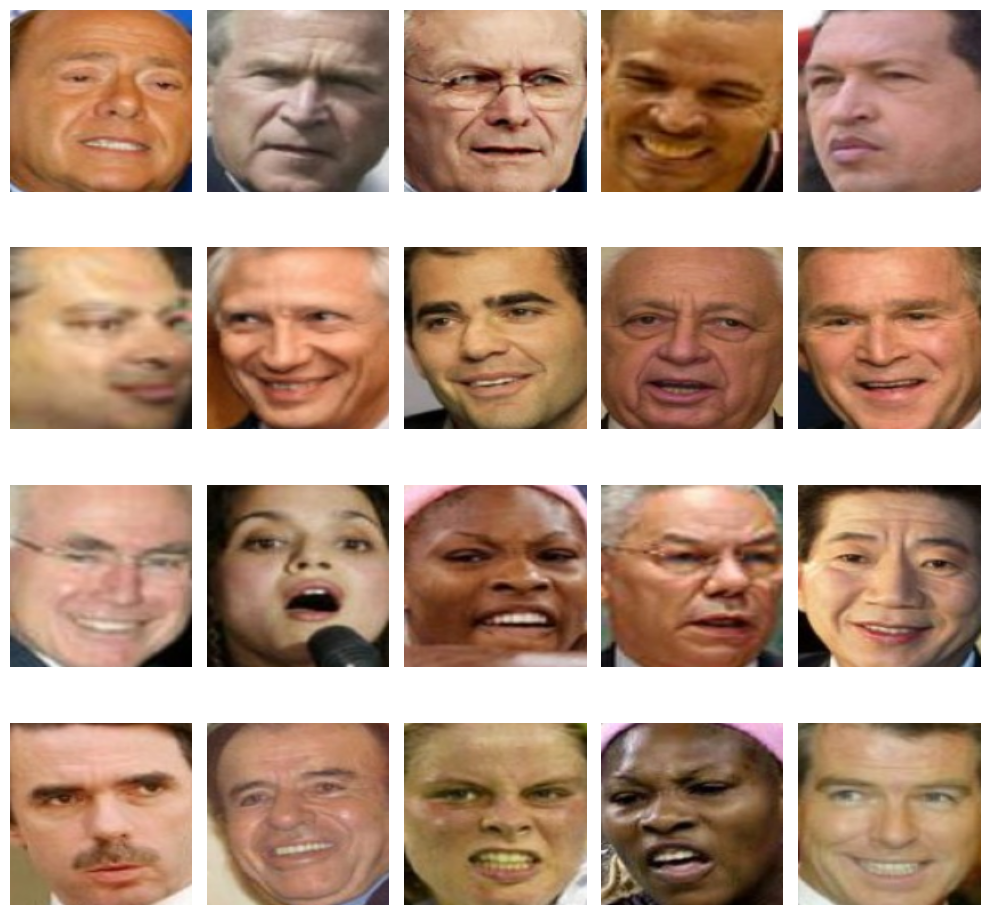

In [15]:
import random
plot_faces()

### face recognition

In [16]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [17]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))
EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━

In [18]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

## **SVM Model**

## encoding to data

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

## split data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=42)

In [21]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [22]:
train_ypreds = model.predict(X_train)
ypreds = model.predict(X_test)

## **Evalution**

In [23]:
accuracy_score(Y_train, train_ypreds)

0.9913660191181005

In [24]:
accuracy_score(Y_test, ypreds)

0.9861239592969473

In [25]:
test_img = cv.imread('/kaggle/input/vggface-using-tripletloss/dataset/dataset/David_Beckham/David_Beckham_0005.jpg')
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB) 
x,y,w,h = detector.detect_faces(test_img)[0]['box']
x,y = abs(x), abs(y)
test_image = test_img[y: y+h, x:x+w]
test_image = cv.resize(test_image, (160,160))
test_image = get_embedding(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [26]:
ypreds = model.predict([test_image])

In [27]:
encoder.inverse_transform(ypreds)[0]

'David_Beckham'

Predicted: David_Beckham
Expected: David_Beckham


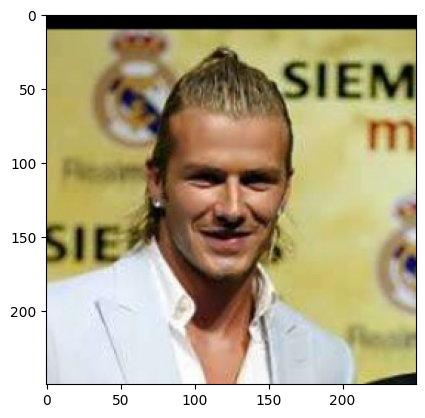

In [28]:
print(f'Predicted: {encoder.inverse_transform(ypreds)[0]}')
print('Expected: David_Beckham')
# plot for fun
plt.imshow(test_img)
plt.show()